# Data visualisation 

## Imports

In [83]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import numpy as np
import seaborn as sns
import math

# From papers custom package
from papers import data, reports

## Generate the data from papers.data module

In [2]:
topic = data.get_key_words()

Enter key words: automation container terminal


In [3]:
papers_df = data.scraper_api(topic)

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10


In [22]:
papers_df

,title,year,citations
0,Cyber threats in maritime container terminal a...,2016,4
1,Cooperative Scheduling of AGV and ASC in Autom...,2021,1
2,Performance analysis of a new type of automate...,2014,8
3,A Study on Application of Yard Transportaion E...,2018,2
4,Analysis of Automation Implementation in Indon...,2020,0
...,...,...,...
65,Yard crane and AGV scheduling in automated con...,2020,11
66,Retrofit solution-mitigate 480V power system h...,2017,4
67,Automated Container Terminal Production Operat...,2021,0
68,On the Automation of Ports and Logistics Chain...,2020,2


## Basic visualisation

### Publications per year

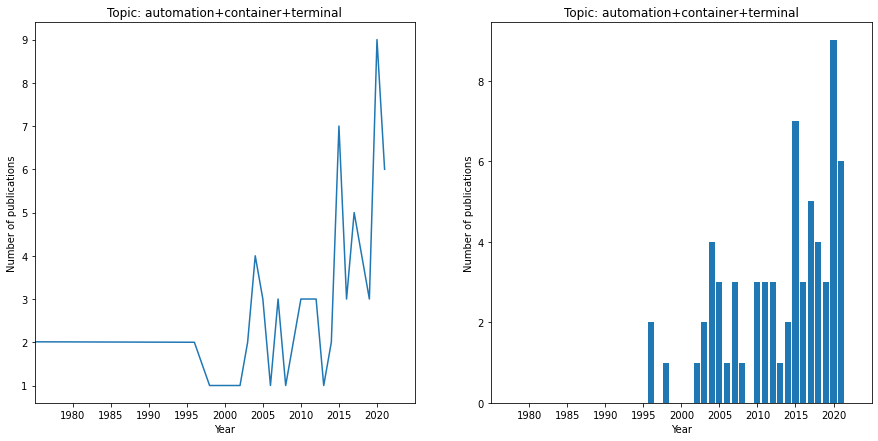

In [14]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(papers_df.groupby("year").count()["title"])
plt.xlabel("Year")
plt.ylabel("Number of publications")
plt.title(f"Topic: {topic}")
plt.xlim((1975,2025))
plt.xticks(np.arange(1980,2025,5))

plt.subplot(1,2,2)
plt.bar(papers_df.groupby("year").count()["title"].index, papers_df.groupby("year").count()["title"])
plt.xlabel("Year")
plt.ylabel("Number of publications")
plt.title(f"Topic: {topic}")
plt.xlim((1975,2025))
plt.xticks(np.arange(1980,2025,5));

### Total citations per year

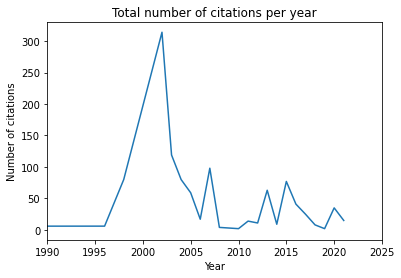

In [32]:
# Plot of total number of citations per year
plt.plot(papers_df.groupby("year").sum().index, papers_df.groupby("year").sum())
plt.xlim((1990, 2025))
plt.title("Total number of citations per year")
plt.xlabel("Year")
plt.ylabel("Number of citations");

### Advanced visualisation (custom atom graph)

In [39]:
# Sorting of dataframe + create "radius" column
sorted_df = papers_df.sort_values(by="citations", ascending = False)
sorted_df["radius"] = (sorted_df["citations"]/314)*2 + 0.5

,title,year,citations
51,"Design, simulation, and evaluation of automate...",2002,314
19,Deadlock prevention for automated guided vehic...,2007,80
64,A modelling and simulation methodology for man...,1998,80
48,An ERP approach for container terminal operati...,2003,68
43,Optimisation for job scheduling at automated c...,2013,63
...,...,...,...
40,Automation of operations in Durres Port Contai...,2012,0
30,Simulation Methodology for Automation of Port ...,2010,0
36,INFORMATION TECHNOLOGY IN PORT CONTAINER TERMI...,2017,0
34,Authentication Technologies of X-ray Inspectio...,2005,0


In [132]:
# Creation of thetas column
n_low_cited  = sorted_df[sorted_df["citations"]<=5].count()[0]
n_mid_cited  = sorted_df[(sorted_df["citations"]>5) & (sorted_df["citations"] <= 20)].count()[0]
n_high_cited = sorted_df[(sorted_df["citations"]>20) & (sorted_df["citations"] <= 100)].count()[0]

theta3 = np.linspace(0, 360, num=n_high_cited, endpoint=False)
theta2 = np.linspace(0, 360, num=n_mid_cited, endpoint=False)
theta1 = np.linspace(0, 360, num=n_low_cited, endpoint=False)

alpha = np.array(0)
thetas = np.hstack((alpha, theta1,theta2, theta3))

sorted_df["thetas"] = thetas

In [157]:
# Creation of "coeff" column
sorted_df["coeff"] = 0

for i in sorted_df.index:
    if sorted_df.at[i, "citations"] <= 5:
        sorted_df.at[i, 'coeff'] = 8
    elif (sorted_df.at[i, "citations"] > 5) & (sorted_df.at[i, "citations"] <= 20):
        sorted_df.at[i, 'coeff'] = 6
    elif (sorted_df.at[i, "citations"] > 20) & (sorted_df.at[i, "citations"] <= 100):
        sorted_df.at[i, 'coeff'] = 4

In [160]:
# Creation of "x_center" and "y_center" columns
sorted_df["x_center"] = 10
sorted_df["y_center"] = 10

for i in sorted_df.index:
    sorted_df.at[i, 'x_center'] = np.cos(sorted_df.at[i, 'thetas'])*sorted_df.at[i, 'coeff'] + 10
    sorted_df.at[i, 'y_center'] = np.sin(sorted_df.at[i, 'thetas'])*sorted_df.at[i, 'coeff'] + 10
    
sorted_df

,title,year,citations,radius,thetas,coeff,x_center,y_center
51,"Design, simulation, and evaluation of automate...",2002,314,2.500000,0.0,0,10,10
19,Deadlock prevention for automated guided vehic...,2007,80,1.009554,0.0,4,14,10
64,A modelling and simulation methodology for man...,1998,80,1.009554,8.0,4,9,13
48,An ERP approach for container terminal operati...,2003,68,0.933121,16.0,4,6,8
43,Optimisation for job scheduling at automated c...,2013,63,0.901274,24.0,4,11,6
...,...,...,...,...,...,...,...,...
40,Automation of operations in Durres Port Contai...,2012,0,0.500000,160.0,8,2,11
30,Simulation Methodology for Automation of Port ...,2010,0,0.500000,200.0,8,13,3
36,INFORMATION TECHNOLOGY IN PORT CONTAINER TERMI...,2017,0,0.500000,240.0,8,12,17
34,Authentication Technologies of X-ray Inspectio...,2005,0,0.500000,280.0,8,2,6


In [168]:
# Creation of custom "ATOM" graph
# The most cited paper(s) stands in the middle, and least cited papers gravitate around
# The bigger the dot, the more citations
# Colors indicate range of citations
# Problem: the centers (blue dots) are not aligned with the colored circles
# Also, want to change hovering text to Year + Citations (instead of x_center, y_center)

fig = go.Figure(data=go.Scatter(x=sorted_df["x_center"], y=sorted_df["y_center"], mode='markers'))

# Set axes properties
fig.update_xaxes(range=[0, 20], zeroline=False)
fig.update_yaxes(range=[0, 20])

# Add circles
fig.add_shape(type="circle",
    xref="x", yref="y",
    fillcolor="LightSeaGreen",
    x0=8.5, y0=8.5, x1=11.5, y1=11.5,
    line_color="black",
)
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=6, y0=6, x1=14, y1=14,
    line_color="black",
)
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=4, y0=4, x1=16, y1=16,
    line_color="black",
)
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=2, y0=2, x1=18, y1=18,
    line_color="black",
)

# Mx = cosØ*r and My = sinØ*r
j = 0
k = 0
l = 0
for i, row in sorted_df[1:].iterrows():
    #print(row.radius)
    theta = randint(0,360)
    if row.citations <= 5:
        theta = theta1[j]
        x_center = np.cos(theta)*8 + 10
        y_center = np.sin(theta)*8 + 10
        color = "orange"
        j = j + 1
    elif row.citations > 5 and row.citations <=20:
        theta = theta2[k]
        x_center = np.cos(theta)*6 + 10
        y_center = np.sin(theta)*6 + 10
        color = "yellow"
        k = k + 1
    elif row.citations > 20 and row.citations <= 100:
        theta = theta3[l]
        x_center = np.cos(theta)*4 + 10
        y_center = np.sin(theta)*4 + 10
        color = "green"
        l = l + 1
    fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=x_center-(row.radius/2), y0=y_center-(row.radius/2), x1=x_center+(row.radius/2), y1=y_center+(row.radius/2),
    fillcolor=color,
    )

# Set figure size
fig.update_layout(width=800, height=800)

fig.show()